In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
df = pd.read_csv(r'/content/Tesla.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [5]:
df.shape

(1692, 6)

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

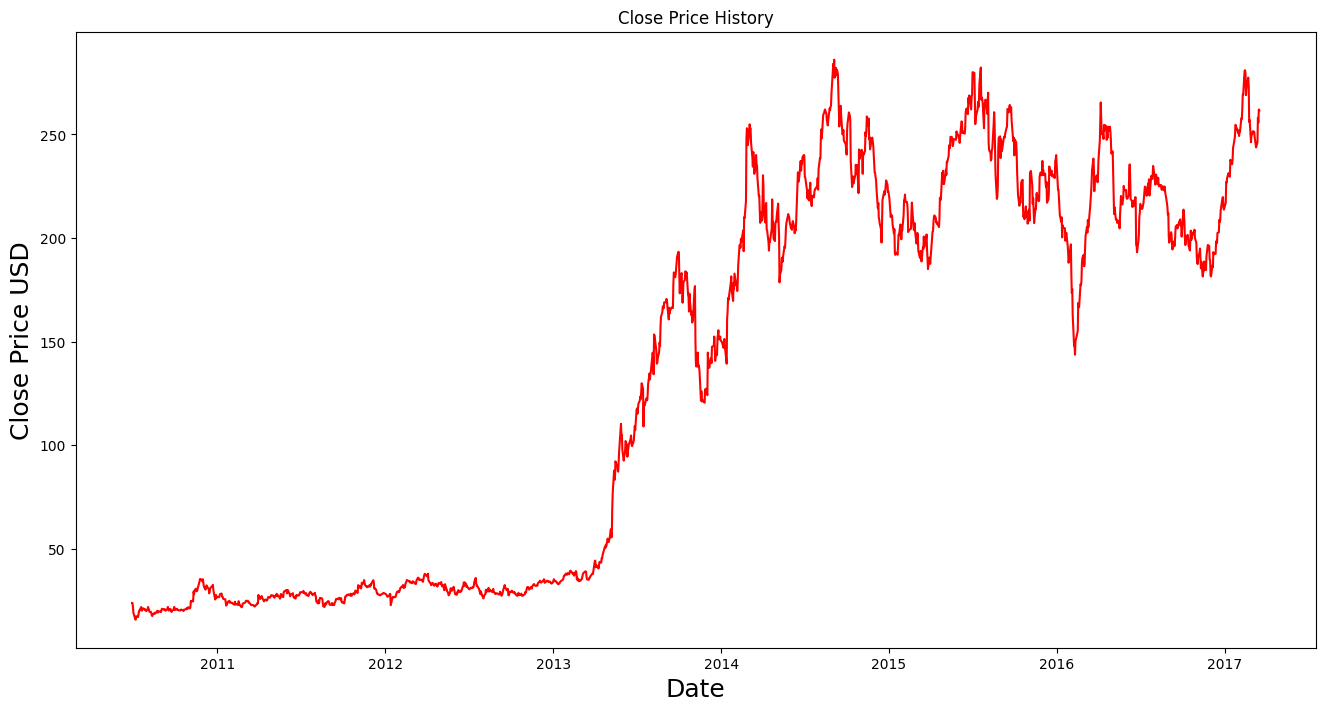

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [8]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1354

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [10]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

In [11]:
import numpy as np

In [12]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [14]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 14s 7ms/step - loss: 0.0032
Epoch 2/10
1294/1294 [==============================] - 10s 8ms/step - loss: 0.0013
Epoch 3/10
1294/1294 [==============================] - 10s 8ms/step - loss: 8.7773e-04
Epoch 4/10
1294/1294 [==============================] - 10s 8ms/step - loss: 7.9816e-04
Epoch 5/10
1294/1294 [==============================] - 9s 7ms/step - loss: 6.3265e-04
Epoch 6/10
1294/1294 [==============================] - 10s 8ms/step - loss: 5.0493e-04
Epoch 7/10
1294/1294 [==============================] - 10s 8ms/step - loss: 7.2233e-04
Epoch 8/10
1294/1294 [==============================] - 10s 7ms/step - loss: 6.1055e-04
Epoch 9/10
1294/1294 [==============================] - 9s 7ms/step - loss: 5.3445e-04
Epoch 10/10
1294/1294 [==============================] - 10s 8ms/step - loss: 5.3102e-04


In [18]:
test_data= scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [19]:
x_test = np.array(x_test)

In [20]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [21]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 5ms/step


In [22]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.04713918790738301

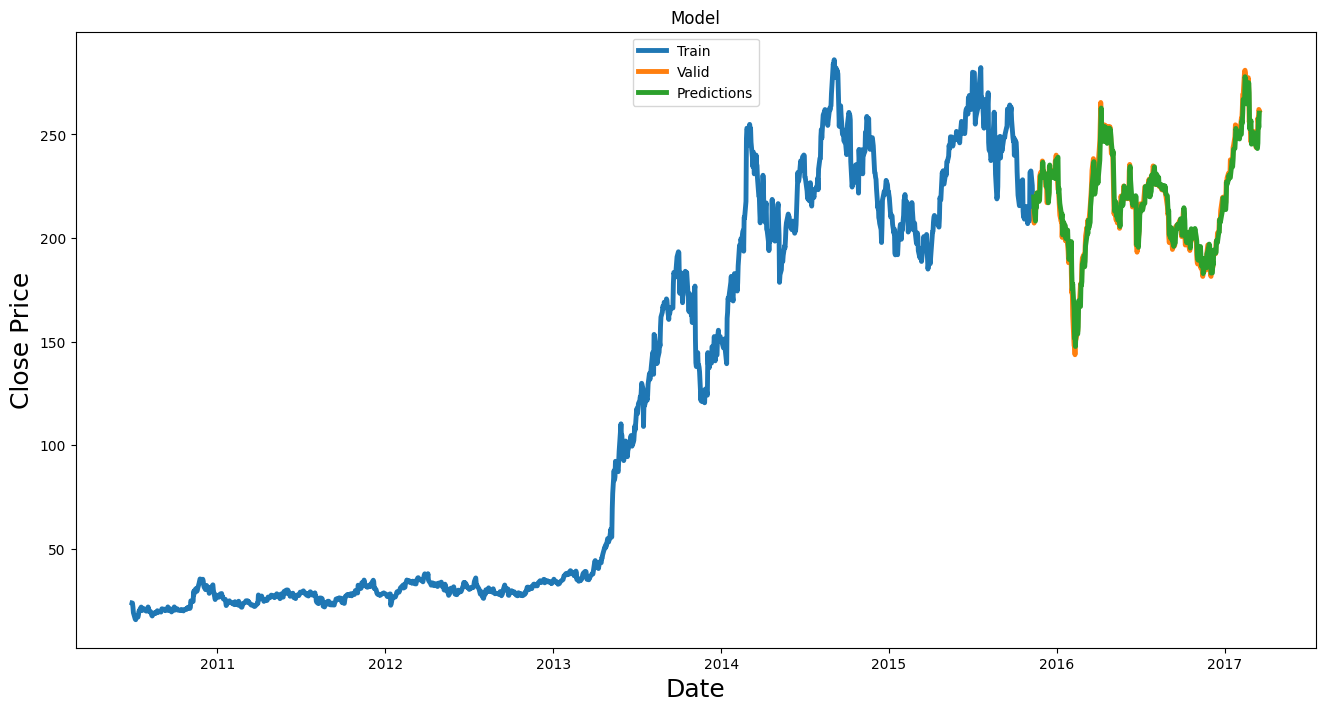

In [23]:
import warnings
warnings.filterwarnings('ignore')


train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper center')
plt.show()

In [24]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,219.813629
2015-11-13,207.190002,213.420609
2015-11-16,214.309998,208.180771
2015-11-17,214.000000,215.914581
2015-11-18,221.070007,214.766846
...,...,...
2017-03-13,246.169998,243.167664
2017-03-14,258.000000,245.813477
2017-03-15,255.729996,257.567963
